#  <span style="color:blue">Binary Classification in Financial Fraud Using Pycaret</span>

![oi](pycaret.png)

### O pycaret é uma ferramente de auto-machine learning escrita em python que premite automatizar muitos processo de preparação dos dados. Essa biblioteca foi inspirada no pacote caret da linguagem R. O principal objetivo do pycaret é reduzir o tempo de ciclo da etapa de hipótese até os insights, reduzindo o almentando consideravelmente a produtividade.

### O problema que trataremos é um típico problema de classificação binária. Temos um dataset condendo dados sobre transações financeiras feitas por clientes atráves de vários servisos bancários. O objetivo é prever a ocorrencia de transações fraudulentas usando modelos de machine learning. O dataset é composto de 7 colunas com valores númericos e uma coluna categórica contendo as duas classes que quermos prever. 

### A classificação binária é um típo de técnica de machine learning supervisionada para prever a distribuição entre duas classes discretas distintas. Com relação ao nosso problema em particular temos duas classes: uma representa um transação legitima e uma outra que representa uma tranasação fraudulenta. Aplicaremos os recursos do pycaret para tratarmos os dados passando todas as etapas necessárias, desde o tratamento de missing values até a normalização dos valores.

# 1 Getting the Data

In [37]:
from pycaret.classification import * # Importando o classificador binário do pycaret
import pandas as pd 

In [38]:
# Load dataset
data = pd.read_csv('Fraud-Small.csv')

In [39]:
# Exibindo os dados
data.head()

,isFraud,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,0,307,CASH_OUT,212504.03,0.00,0.00,326501.68,426742.65
1,0,394,CASH_OUT,143744.10,0.00,0.00,3644294.29,3788038.38
2,0,252,PAYMENT,52064.37,99568.00,47503.63,0.00,0.00
3,0,216,TRANSFER,77126.57,52708.00,0.00,0.00,77126.57
4,0,383,CASH_IN,196743.11,8509860.63,8706603.74,1108403.13,911660.02


In [40]:
# Exibindo as dimensões do dataset
data.shape

(16426, 8)

# 2 Setting up Environment in PyCaret

### De modo semelhante ao que fazemos quando treinamos algum modelo de machine learning qualquer, rezevamos um parte dos dados para testar o podemos de prevsião do modelo. Com o pycaret também rezevamos uma fração dos dados totais para serem usandos adiante na função `predict_model()`. Contudo essa ação é um pouco diferente do clássico train test split, aqui buscamos uma cituação bem mais próxima da realidade com pycaret.

In [41]:
# Definindo o tamanho da amostra que será usada como teste do modelo
df = data.sample(frac=0.95, random_state=786)
df_unseen = data.drop(df.index)
df.reset_index(inplace=True, drop=True)
df_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(df.shape))
print('Unseen Data For Predictions: ' + str(df_unseen.shape))

Data for Modeling: (15605, 8)
Unseen Data For Predictions: (821, 8)


### Obtemos uma amostra com 821 registros

In [42]:
# Dataframe contendo amostra com os dados
df_unseen.head()

,isFraud,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,0,154,TRANSFER,500312.64,0.00,0.0,6908661.51,7408974.14
1,0,132,TRANSFER,826266.80,317547.28,0.0,6002897.54,6829164.33
2,0,231,PAYMENT,3725.92,0.00,0.0,0.00,0.00
3,0,369,PAYMENT,46657.80,0.00,0.0,0.00,0.00
4,0,332,CASH_OUT,244212.73,19220.18,0.0,692553.34,936766.07


### Agora podemos aplicar a funação `setup()` que cria uma ambiente no pycaret, onde uma pepiline de transformação dos dados necessários para aplicarmos os modelos de machine learning. `setup()` exige apenas  dois paramêtros obrigatórios: um dataframe e a definição de uma variável target, isso mostra a simplicidade do pycaret. Os demais paramêtros podem ser aplicados para costumizar a função para modelagens mais específicas.

### Uma vez que iniciamos o pycaret `setup()` o algoritmo ira inferir o tipo de todas as features baseada nas propriedades dos dados. Porém, a atribuição do tipo de dados nem sempre é correta. Quando isso acontece o pycaret permite que possamos indicar o tipo correto dos dados. Atribuir os valores corretos dos tipos de dados é fundamental para que o algoritmo possa peformar corretamente o modelo. Quando o `setup()` termina a execução temos uma lista com todas as ações executas e outros tipos de ações que não foram previamente configuradas.

In [43]:
# Definimos as features que queremos inserir na modelagem e feature target. Vemos que estamos em adicional pedindo que o
# pycaret normalize os dados usando o método minmax scale.
s = setup(df[["isFraud", "type", "step", "amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]]
,target = "isFraud"
,normalize = True
,normalize_method = "minmax"
,data_split_stratify = True
,fix_imbalance = True,
)

,Description,Value
0,session_id,4886
1,Target,isFraud
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(15605, 8)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


###  O pepiline `setup()` devolve uma grande quantidade de funções e informações gerais sobre o processamento de dados. Vamos descrever algumas dasmais relevantes.
### - **session_id :** A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the `session_id` is set as `123` for later reproducibility.

### - **Target Type :**  Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

### - **Label Encoded :**  When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. In this experiment no label encoding is required since the target variable is of type numeric.

### - **Original Data :**  Displays the original shape of the dataset. In this experiment (15605, 8) means 15605 samples and 8 features including the target column.

### - **Missing Values :**  When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset. 

### - **Categorical Features :**  The number of features inferred as categorical. In this dataset, 1 out of 8 features are inferred as categorical.

### - **Numeric Features :**  The number of features inferred as numeric. In this dataset, 6 out of 8 features are inferred as numeric.

### - **Transformed Train Set :**  Displays the shape of the transformed training set. Notice that the original shape of (15605, 8) is transformed into (10923, 11) for the transformed train set and the number of features have increased to 11 from 8 due to categorical encoding.

### - **Transformed Test Set :**  Displays the shape of the transformed test/hold-out set. There are 4682 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the `train_size` parameter in setup.

# 3 Comparing All Models

### A função `compare_models()` é executada depois da função `setup()` e permite compararmos a peformance de vários modelos de machine learning. Será exibido as principais métricas como accuracy, AUC, recall, precision, F1, kappa, e MCC. O cross validation foi fixado em 5 folds para cada algoritmo. A medida que `compare_models()` evoluie, os modelos com as melhores métricas será exibido na parte superior da siada da função.

In [16]:
best = compare_models(fold = 5, sort = 'AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9935,0.9992,0.9971,0.9900,0.9935,0.9870,0.9870,0.1880
rf,Random Forest Classifier,0.9906,0.9989,0.9952,0.9861,0.9906,0.9811,0.9812,0.4740
et,Extra Trees Classifier,0.9853,0.9985,0.9881,0.9825,0.9853,0.9705,0.9705,0.3720
gbc,Gradient Boosting Classifier,0.9880,0.9983,0.9951,0.9812,0.9881,0.9760,0.9761,0.7160
ada,Ada Boost Classifier,0.9794,0.9971,0.9854,0.9738,0.9795,0.9588,0.9589,0.3060
dt,Decision Tree Classifier,0.9881,0.9881,0.9892,0.9870,0.9881,0.9762,0.9762,0.1140
knn,K Neighbors Classifier,0.9171,0.9641,0.9131,0.9206,0.9168,0.8341,0.8342,1.2420
lda,Linear Discriminant Analysis,0.8720,0.9567,0.9347,0.8308,0.8797,0.7440,0.7500,0.0960
lr,Logistic Regression,0.8308,0.9223,0.8806,0.8012,0.8390,0.6616,0.6649,1.6600
nb,Naive Bayes,0.7843,0.9183,0.9995,0.6990,0.8227,0.5684,0.6298,0.1040


### O modelo Light Gradient Boosting Machine foi o que apresentou as melhores métricas de avaliação. Além disso os 6 primeiros modelos apresentaram todas as métricas de avaliação com valores acima de 0.9000

In [44]:
# Aqui printamos os hiperparamêtros do modelo melhor avaliado 
print(lightgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=3504, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


### Ainda podemos tentar melhorar ainda mais nosso modelo usando o cross valadation e obter avaliações nas métricas de validação ainda melhores.

In [17]:
lightgbm = create_model('lightgbm', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9927,0.9985,0.9954,0.9900,0.9927,0.9854,0.9854
1,0.9913,0.9990,0.9963,0.9864,0.9914,0.9826,0.9827
2,0.9950,0.9994,0.9982,0.9918,0.9950,0.9899,0.9900
3,0.9931,0.9999,0.9973,0.9891,0.9932,0.9863,0.9863
4,0.9954,0.9995,0.9982,0.9927,0.9954,0.9908,0.9909
Mean,0.9935,0.9992,0.9971,0.9900,0.9935,0.9870,0.9870
SD,0.0015,0.0005,0.0011,0.0022,0.0015,0.0030,0.0030


# 4 Tune a Model

### O próximo passo é tunar os hiperparâmetros do modelo. Os hiperparâmetros de `create_model()` por definição vem com valores padrão. A função `tune_model()` tuna automaticamente os hiperparâmetros do modelo usando a clássica técnica `Random Grid Search`. Também estamos livres para customizar os intervalos dos valores de pesquisa dos hiperparâmetros.

In [18]:
tuned_lightgbm =tune_model(lightgbm
,fold = 5
,custom_grid = {
   "learning_rate":[0.1, 0.2, 0.5]
   ,"num_iterations":[100, 500, 1000]
   ,"min_data_in_leaf":[10, 20, 50]
   ,"max_depth":[1, 3, 9]
}
,optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9913,0.9988,0.9945,0.9882,0.9913,0.9826,0.9826
1,0.9936,0.9993,0.9963,0.9909,0.9936,0.9872,0.9872
2,0.9968,0.9996,0.9982,0.9954,0.9968,0.9936,0.9936
3,0.9940,0.9998,0.9973,0.9909,0.9941,0.9881,0.9881
4,0.9954,0.9994,0.9982,0.9927,0.9954,0.9908,0.9909
Mean,0.9942,0.9994,0.9969,0.9916,0.9943,0.9885,0.9885
SD,0.0018,0.0003,0.0014,0.0024,0.0018,0.0037,0.0037


In [19]:
# Printando os hiperparâmetros tunados do modelo tuned_lightgb
print(tuned_lightgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=3,
               min_child_samples=20, min_child_weight=0.001,
               min_data_in_leaf=20, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_iterations=500, num_leaves=31, objective=None,
               random_state=3504, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


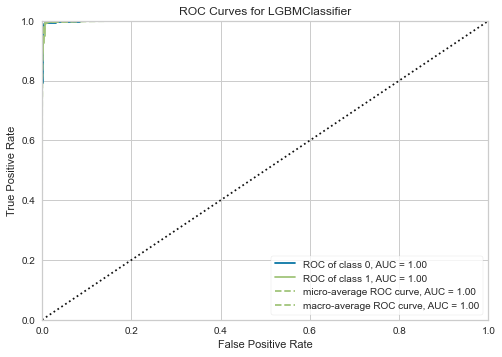

In [20]:
# plot_model para a curva ROC-AUC
plot_model(tuned_lightgbm, plot = 'auc')

### Vemos que o modelo tunado classifica perfeitamnete as classes dos nossos dados. Isso acontece pelo alta performance que o modelo alcansou para esse conjunto de dados, mas não podemos descartar que houve overffing. 

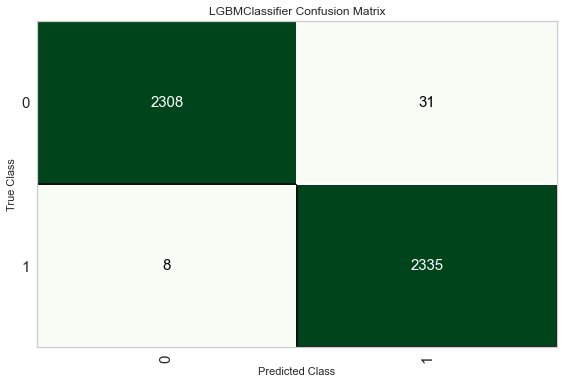

In [22]:
# Plotando confusion matrix
plot_model(tuned_lightgbm, plot = 'confusion_matrix')

# 5 Predict on test/ hold-out sample

### Agora devemos checar a evolução das métricas de avaliação usando os dodos que separamos antes de criarmos o `setup()`. Destinamos 30% dos dados originais para constituir um conjunto de dados nunca visto pelo modelo treinado `tuned_lightgbm()`.

In [23]:
# Visualizando as métricas de avaliação para os dados hold-out usando o modelo tuned_lightgbm.
predict_model(tuned_lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9917,0.9990,0.9966,0.9869,0.9917,0.9833,0.9834


### Mesmo com os dados que o modelo nunca viu, os valores das métricas de avaliação são muito bons. Mostrando que o modelo é excelente para classificar fraudes financeiras para esse conjunto de dados.

# 6 Finalize Model for Deployment

### A parte final do nosso experimento é preparar o modelo para exportar o modelo treinado para que este possa ser utilizado em outros modelagens. A função `finalize_model()` cria um dataset do modelo treinado junto com os 30% de validação.

In [24]:
# Criando finalize_model() para o modelo treinado.
final_lightgbm = finalize_model(tuned_lightgbm)

In [25]:
# Plotando os hiperparâmetros do modelo finalizado
print(final_lightgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=3,
               min_child_samples=20, min_child_weight=0.001,
               min_data_in_leaf=20, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_iterations=500, num_leaves=31, objective=None,
               random_state=3504, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [27]:
# testando a previsão com os dados de treino
predict_model(final_lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


# 7 Predict on unseen data

### Com base no dataset dos dados ainda não vistos criamos um coluna 'label' com o valor da classe prevista e o uma coluna com o score.

In [28]:
# Criando um coluna com valores das classes previstas dos dados não vistos pelo modelo.
unseen_predictions = predict_model(final_lightgbm, data=df_unseen)
unseen_predictions.head()

,isFraud,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,Label,Score
0,0,154,TRANSFER,500312.64,0.00,0.0,6908661.51,7408974.14,0,1.0000
1,0,132,TRANSFER,826266.80,317547.28,0.0,6002897.54,6829164.33,0,0.9999
2,0,231,PAYMENT,3725.92,0.00,0.0,0.00,0.00,0,1.0000
3,0,369,PAYMENT,46657.80,0.00,0.0,0.00,0.00,0,1.0000
4,0,332,CASH_OUT,244212.73,19220.18,0.0,692553.34,936766.07,0,1.0000


# 8 Saving the model

### Com a função `save_model()` podemos salvar nosso modelo treinado para que possamos usar em outras situações, por exemplo quando aparece novos dados para serem classificados pelo modelo. A função `save_model()` gera uma pepiline com as etapas necessárias para salvar o modelo treinado no formato pickler. 

In [29]:
# Salvando o modelo final_lightgbm
save_model(final_lightgbm,'Final Lightgbm Model ')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='isFraud',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.2, max_depth=3,
                                 min_child_samples=20, min_child_weight=0.001,
                                 min_data_in_leaf=

# 9 Loading the saved model

### Quando recarremos o modelo salvo, mostramos que função de predição para dados novos ainda é mesma do modelo gerado antes de ser valvo. Isso garante a confiabilidade e escalabilidade dos modelo gerados pelo pycarete.

In [31]:
# Carregando o modelo salvo
saved_final_lightgbm = load_model('Final Lightgbm Model ')

Transformation Pipeline and Model Successfully Loaded


In [33]:
# Criando dataset com as classes previstas com o modelo salvo 
new_prediction = predict_model(saved_final_lightgbm, data=df_unseen)

In [34]:
new_prediction.head()

,isFraud,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,Label,Score
0,0,154,TRANSFER,500312.64,0.00,0.0,6908661.51,7408974.14,0,1.0000
1,0,132,TRANSFER,826266.80,317547.28,0.0,6002897.54,6829164.33,0,0.9999
2,0,231,PAYMENT,3725.92,0.00,0.0,0.00,0.00,0,1.0000
3,0,369,PAYMENT,46657.80,0.00,0.0,0.00,0.00,0,1.0000
4,0,332,CASH_OUT,244212.73,19220.18,0.0,692553.34,936766.07,0,1.0000


In [36]:
# Mostrando a acuaracia do modelo salvo.
from pycaret.utils import check_metric
check_metric(new_prediction['isFraud'], new_prediction['Label'], metric = 'Accuracy')

0.9951

# 10 Conclusion

### Demonstramos o funcionamento básico do pycaret como framework de auto machine learning. Quando aplicamos o pycaret para classificar fraudes em transações, vimos que o modelo alcansou alto desempenho na classificação. O modelo final foi salvo com seus hiperparâmetros juntamente com um dataset com dados nunca vistos pelo modelo. Na última etapa testamos a validação do modelo com os dados nunca vistos pelo modelo. O pycaret se mostrou uma poderosa feramenta para nosso proposta de classificação binária de classes.